In [1]:
from IPython.core.display import HTML
css_file = '../../msc/custom.css' 
HTML(open(css_file, 'r').read())

# Object Oriented Programming


In this lecture, we will study Object-Oriented Programming (OOP) and discover that there is a tight link between this programming paradimg and economics. To keep economics front and center, we will explore the usefulness of the OOP paradigm by implementing a seminal paper by Gary Becker.

> Gary S. Becker (1962). Irrational Behavior and Economic Theory, *Journal of Political Economy*, 70(1): 1-13.

**Roadmap**
* Basics of Object Oriented Programming
* Irrational Behavior and Economics Theory
 * Implementation


## Basics of Object Oriented Programming

What are the potential advantages of an OOP implementation?

* Modularization of Code, i.e. grouping of data and functions
* Elegance of Implementation
* Understanding of Problem

Keywords:

* Encapsulation
* Inheritance
* Polymorphism

You will see all these elements in our implementation of Becker (1962). However, let us start with a strip down example:

In [2]:
class Agent:
    def __init__(self, endowment):
        """ Initialize agents with endowment.
        """
        # Endowment
        self.endowment = endowment

        # Demands 
        self.butter = None
        self.milk = None
        
    def choose(self, price_butter, price_milk):
        """ Allocate half of endowment to each
            of the two goods.
        """
        self.butter = self.endowment/price_butter
        self.milk   = self.endowment/price_milk
        
    def get_demands(self):
        """ Return demands.
        """
        return self.butter, self.milk
    

# Initialize and agent with an endowment
ENDOWMENT, PRICE_BUTTER, PRICE_MILK = 10, 2, 3

agent_obj = Agent(ENDOWMENT)

agent_obj.choose(PRICE_BUTTER, PRICE_MILK)

print ' Let us have a look at the demand for the two goods: '
print '... using the demand() method      ', agent_obj.get_demands()
print '... accessing the class attributes ', (agent_obj.butter, agent_obj.milk)


 Let us have a look at the demand for the two goods: 
... using the demand() method       (5, 3)
... accessing the class attributes  (5, 3)


## Irrational Behavior and Economics Theory

The purpose of the paper is ...
> to show how important theorems of modern economics result from general principle which not only includes rational behavior and survival arguments as special cases, but also much more irrational behavior. 

Becker's main conclusion follows:

> .. economic theory is much more compatible with irrational behavior than had previoulsy been suspected.  

In particular, Becker studies the robustness of the fundamental theorem of household demand:

> .. that the demand curve for any commodity, real income held constant, must be negatively inclined.  

Figure 1 allows us to briefly discuss the traditional theory. 

<img src="images/figure_1.png">

Let us use Figure 2 to discuss a more general approach.

<img src="images/figure_2.png">

Overall Becker concludes:

> The fundamental theorem of traditional theory - that demand curves are negatively declined - largely results from the change in opportunities alone and is largely independent of the decicion rule.

Even an irrational agent has to live within his means. 

### Implementation

In [3]:
# Fundamental Numerical Methods
import numpy as np

# System-specific parameters and functions
import sys

# Plotting 
import matplotlib.pyplot as plt
%pylab inline --no-import-all

# Adding the modules subdirectory
sys.path.insert(0, 'modules')

# Project library
from clsAgent import *
from clsEconomy import *

Populating the interactive namespace from numpy and matplotlib


Let us set some basic parameters for our illustration:

In [4]:
NUM_AGENTS = 10  # Number of agents in the population

ENDOWMENT = 10.0  # Endowments of agents

ALPHA = 0.75      # Utility weights

P1 = 1.0          # Price of first good (Numeraire)

NUM_POINTS = 25   # Number of points for grid of proce changes

# Construct grid for price changes.
PRICE_GRID = np.linspace(P1, 10, num=NUM_POINTS)

Now we simulate two agent populations of the different types: (1) Rational, and (2) Random.


* **Random** 

The agent choose a random bundle on the budget line.

* **Rational** 

The agent maximizes a CES utility function subject to the budget constraint.

\begin{align}
U(x_1, x_2) = x_1^\alpha x_2^{1 - \alpha}
\end{align}


In [5]:
# Simulate agent populations of different types
agent_objs = dict()

for type_ in ['random', 'rational']:
    
    agent_objs[type_] = []
    
    for _ in range(NUM_AGENTS):
        
        if type_ =='rational':
            agent_obj = RationalAgent()
        elif type_ == 'random':
            agent_obj = RandomAgent()
        else:
            raise AssertionError
                        
        agent_obj.set_preference_parameter(ALPHA)

        agent_obj.set_endowment(ENDOWMENT)

        agent_objs[type_] += [agent_obj]

Let us get the market demands for different price schedules. 

In [6]:
# Get market demands for varying price schedules
market_demands = dict()

for type_ in ['random', 'rational']:
    
    market_demands[type_] = []
    
    # Initialize economy with agent of particular types
    economy_obj = EconomyCls(agent_objs[type_])
    
    # Vary price schedule for the seoncd good.
    for p2 in PRICE_GRID:

        # Construct market demand for second good
        demand = economy_obj.get_aggregate_demand(P1, p2)[1]

        # Scaling to average demand
        demand = demand/float(NUM_AGENTS)
        
        # Collect demands
        market_demands[type_] += [demand]

Let us compare the demands for an individual agent. Of course, in the rational case all agents have exactly the same demand.

In [7]:
# Draw a random agent from the population
idx = np.random.random_integers(0, NUM_AGENTS - 1)

# Select agent for further study
agent_ration = agent_objs['rational'][idx]
agent_random = agent_objs['random'][idx]

# Obtain individual demands
individual_demands = {}

for type_ in ['rational', 'random']:
    
    # Initialize container for results
    individual_demands[type_] = []
    
    # Select the relevant agent type
    if type_ == 'rational':
        agent_obj = agent_ration
    elif type_ == 'random':
        agent_obj = agent_random
    
    # Obtain individual demands as we vary the price
    # of the second good.
    for p2 in PRICE_GRID:

        agent_obj.choose(P1, p2)
        
        individual_demands[type_] += [agent_obj.get_individual_demand()[1]]

Let us visiualize the different individual demands as we increase the price of good 2.

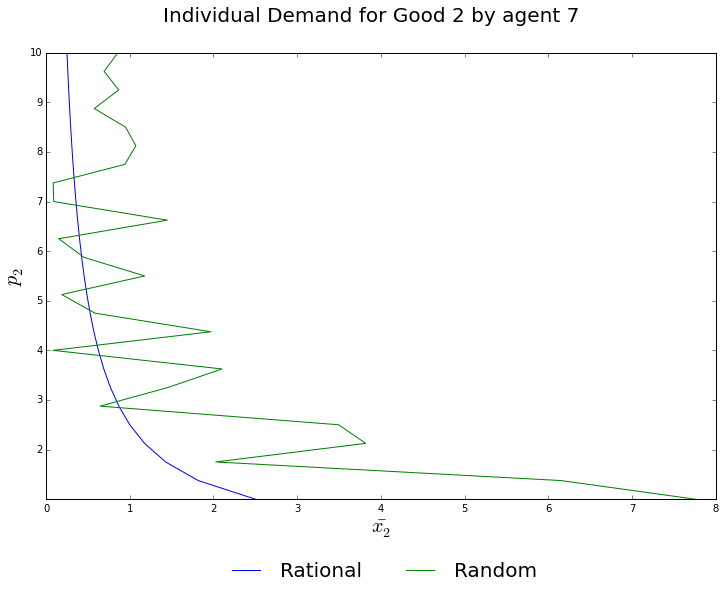

In [8]:
# Initialize canvas
ax = plt.figure(figsize=(12,8)).add_subplot(111)

# Plot demands by population types
ax.plot(individual_demands['rational'], PRICE_GRID, label='Rational')
ax.plot(individual_demands['random'], PRICE_GRID, label='Random')

# Set title and axis labels
plt.suptitle('Individual Demand for Good 2 by agent ' + str(idx), fontsize=20)
ax.set_xlabel(r'$\bar{x_2}$', fontsize=20)
ax.set_ylabel(r'$p_2$', fontsize=20)

# Set up legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
    fancybox=False, frameon=False, shadow=False, ncol=2, fontsize=20)

# Remove first element on y-axis
ax.yaxis.get_major_ticks()[0].set_visible(False)
plt.show()

How about demands at the aggregate level?

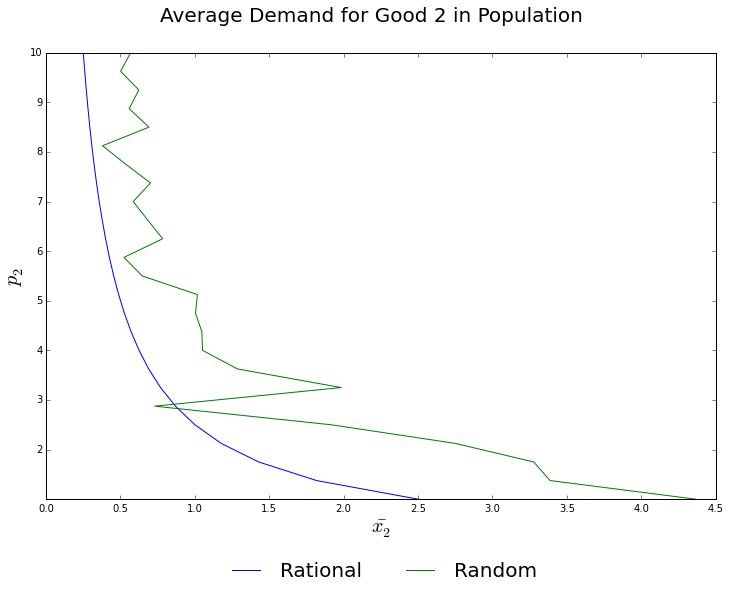

In [9]:
# Initialize canvas
ax = plt.figure(figsize=(12,8)).add_subplot(111)

# Plot execution times by implementations
ax.plot(market_demands['rational'], PRICE_GRID, label='Rational')
ax.plot(market_demands['random'], PRICE_GRID, label='Random')

# Set title and axis labels
plt.suptitle('Average Demand for Good 2 in Population', fontsize=20)
ax.set_xlabel(r'$\bar{x_2}$', fontsize=20)
ax.set_ylabel(r'$p_2$', fontsize=20)

# Set up legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
    fancybox=False, frameon=False, shadow=False, ncol=2, fontsize=20)

# Remove first element on y-axis
ax.yaxis.get_major_ticks()[0].set_visible(False)
plt.show()

## Additional Resources

http://www.python-course.eu/object_oriented_programming.php